# 고객 랭킹 및 군집화(clustering)

# (0) 필요한 모듈

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle #데이터를 작은 용량으로 저장하는 모듈

from sklearn.preprocessing import StandardScaler

In [2]:
#현재 working directory 확인
os.getcwd()

'/content'

# (1) 파일 불러오기
전처리된 고객 데이터인 cs_data_set_final.csv를 불러옴

In [3]:
#고객 데이터셋 불러옴
cs_data = pd.read_csv("../../../data/Customer/cs_data_set_final.csv")
cs_data

,HLD_TR_RATIO,LONG,SHORT,CASH_AST_M4,RATE_OF_RETURN_M1,RATE_OF_RETURN_M2,RATE_OF_RETURN_M3,RATE_OF_RETURN_M4
0,0.0,1,0,2100000.0,3.092784,13.402062,13.402062,4.545455
1,0.0,1,0,9100000.0,-22.000000,-16.483516,-6.666667,-9.090909
2,0.0,1,0,1000.0,-46.732026,-40.000000,-38.852459,-30.655738
3,0.0,1,0,51000000.0,4.347826,0.000000,0.000000,0.000000
4,0.0,1,0,600000.0,-8.333333,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
540020,0.0,1,0,72000.0,-26.470588,-18.181818,-21.212121,-18.181818
540021,1.0,0,1,4700000.0,-62.337662,-62.666667,-61.333333,-65.333333
540022,0.1,0,1,870000.0,0.000000,12.000000,6.451613,0.000000
540023,0.2,0,1,330000.0,-29.166667,-25.000000,-25.000000,-24.000000


In [4]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HLD_TR_RATIO       540025 non-null  float64
 1   LONG               540025 non-null  int64  
 2   SHORT              540025 non-null  int64  
 3   CASH_AST_M4        540025 non-null  float64
 4   RATE_OF_RETURN_M1  540025 non-null  float64
 5   RATE_OF_RETURN_M2  540025 non-null  float64
 6   RATE_OF_RETURN_M3  540025 non-null  float64
 7   RATE_OF_RETURN_M4  540025 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 33.0 MB


# (2) 고객 랭킹
- 각 월마다 수익률(RATE_OF_RETURN_M1~M4)을 기준으로 고객들의 순위를 매김.
- 순위 매기는 방식: 동일값(동점)에 매겨진 1차 순위의 최솟값으로 최종 순위 부여하고 다음 순위는 1씩 늘어남.

In [5]:
cs_data

,HLD_TR_RATIO,LONG,SHORT,CASH_AST_M4,RATE_OF_RETURN_M1,RATE_OF_RETURN_M2,RATE_OF_RETURN_M3,RATE_OF_RETURN_M4
0,0.0,1,0,2100000.0,3.092784,13.402062,13.402062,4.545455
1,0.0,1,0,9100000.0,-22.000000,-16.483516,-6.666667,-9.090909
2,0.0,1,0,1000.0,-46.732026,-40.000000,-38.852459,-30.655738
3,0.0,1,0,51000000.0,4.347826,0.000000,0.000000,0.000000
4,0.0,1,0,600000.0,-8.333333,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
540020,0.0,1,0,72000.0,-26.470588,-18.181818,-21.212121,-18.181818
540021,1.0,0,1,4700000.0,-62.337662,-62.666667,-61.333333,-65.333333
540022,0.1,0,1,870000.0,0.000000,12.000000,6.451613,0.000000
540023,0.2,0,1,330000.0,-29.166667,-25.000000,-25.000000,-24.000000


In [6]:
#월별 수익률 랭킹 생성
cs_data["RANK_M1"] = cs_data["RATE_OF_RETURN_M1"].rank(method="dense", ascending=False)
cs_data["RANK_M2"] = cs_data["RATE_OF_RETURN_M2"].rank(method="dense", ascending=False)
cs_data["RANK_M3"] = cs_data["RATE_OF_RETURN_M3"].rank(method="dense", ascending=False)
cs_data["RANK_M4"] = cs_data["RATE_OF_RETURN_M4"].rank(method="dense", ascending=False)
cs_data

,HLD_TR_RATIO,LONG,SHORT,CASH_AST_M4,RATE_OF_RETURN_M1,RATE_OF_RETURN_M2,RATE_OF_RETURN_M3,RATE_OF_RETURN_M4,RANK_M1,RANK_M2,RANK_M3,RANK_M4
0,0.0,1,0,2100000.0,3.092784,13.402062,13.402062,4.545455,3920.0,3727.0,4625.0,9102.0
1,0.0,1,0,9100000.0,-22.000000,-16.483516,-6.666667,-9.090909,19286.0,21364.0,14507.0,19723.0
2,0.0,1,0,1000.0,-46.732026,-40.000000,-38.852459,-30.655738,44223.0,43054.0,43786.0,39856.0
3,0.0,1,0,51000000.0,4.347826,0.000000,0.000000,0.000000,3663.0,7997.0,9182.0,11776.0
4,0.0,1,0,600000.0,-8.333333,0.000000,0.000000,0.000000,8526.0,7997.0,9182.0,11776.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540020,0.0,1,0,72000.0,-26.470588,-18.181818,-21.212121,-18.181818,24679.0,23389.0,28813.0,28802.0
540021,1.0,0,1,4700000.0,-62.337662,-62.666667,-61.333333,-65.333333,50846.0,50608.0,51567.0,53102.0
540022,0.1,0,1,870000.0,0.000000,12.000000,6.451613,0.000000,4594.0,3955.0,6319.0,11776.0
540023,0.2,0,1,330000.0,-29.166667,-25.000000,-25.000000,-24.000000,27841.0,30619.0,32659.0,34220.0


In [7]:
#데이터 배열(data)에서 각 값들이 몇 번째 백분위수에 해당하는지 계산한 후, 상위 퍼센트로 변환하는 함수
#상위 퍼센트 = 100 - (백분위수)
def find_percentile_top(data):
    percent_list = []
    sorted_data = np.sort(data)
    count = len(sorted_data)

    for i in range(len(data)):
        rank = np.searchsorted(sorted_data, data[i])
        percentile_rank = (rank / count) * 100
        percentile_top = 100 - percentile_rank
        percent_list.append(percentile_top)

    return percent_list

In [8]:
cs_data["PERCENTILE_M1"] = find_percentile_top(cs_data["RATE_OF_RETURN_M1"])
cs_data["PERCENTILE_M2"] = find_percentile_top(cs_data["RATE_OF_RETURN_M2"])
cs_data["PERCENTILE_M3"] = find_percentile_top(cs_data["RATE_OF_RETURN_M3"])
cs_data["PERCENTILE_M4"] = find_percentile_top(cs_data["RATE_OF_RETURN_M4"])
cs_data

,HLD_TR_RATIO,LONG,SHORT,CASH_AST_M4,RATE_OF_RETURN_M1,RATE_OF_RETURN_M2,RATE_OF_RETURN_M3,RATE_OF_RETURN_M4,RANK_M1,RANK_M2,RANK_M3,RANK_M4,PERCENTILE_M1,PERCENTILE_M2,PERCENTILE_M3,PERCENTILE_M4
0,0.0,1,0,2100000.0,3.092784,13.402062,13.402062,4.545455,3920.0,3727.0,4625.0,9102.0,3.472617,2.903569,4.039443,11.192074
1,0.0,1,0,9100000.0,-22.000000,-16.483516,-6.666667,-9.090909,19286.0,21364.0,14507.0,19723.0,43.756678,47.447989,31.329105,41.346234
2,0.0,1,0,1000.0,-46.732026,-40.000000,-38.852459,-30.655738,44223.0,43054.0,43786.0,39856.0,88.926624,88.001852,86.969122,78.832461
3,0.0,1,0,51000000.0,4.347826,0.000000,0.000000,0.000000,3663.0,7997.0,9182.0,11776.0,3.139114,20.387575,21.419934,25.945095
4,0.0,1,0,600000.0,-8.333333,0.000000,0.000000,0.000000,8526.0,7997.0,9182.0,11776.0,19.627239,20.387575,21.419934,25.945095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540020,0.0,1,0,72000.0,-26.470588,-18.181818,-21.212121,-18.181818,24679.0,23389.0,28813.0,28802.0,54.292672,52.606268,60.516272,58.677098
540021,1.0,0,1,4700000.0,-62.337662,-62.666667,-61.333333,-65.333333,50846.0,50608.0,51567.0,53102.0,97.690848,98.460627,98.157678,98.618397
540022,0.1,0,1,870000.0,0.000000,12.000000,6.451613,0.000000,4594.0,3955.0,6319.0,11776.0,10.748762,3.222258,6.873756,25.945095
540023,0.2,0,1,330000.0,-29.166667,-25.000000,-25.000000,-24.000000,27841.0,30619.0,32659.0,34220.0,60.423499,66.674135,68.323318,69.352900


- RANK: 숫자가 작을수록 높은 수익률 (1위, 2위, ....)
- PERCENTILE: 숫자가 작을수록 높은 수익률 (1%, ...10%, ...)

In [9]:
#상위 퍼센트 기준에 따라 랭킹 등급을 부여해주는 함수 생성
#기준: 마스터(0~5%), 프로(5~15%), 세미프로(15~45%), 루키(45~85%), 비기너(85~100%)
def ranking_grade(percentile_data):

  grade_list = []
  for i in range(len(percentile_data)):
    value = percentile_data[i] #퍼센타일 값

    if value <= 5: #마스터
      grade = "master"
    elif 5 < value <= 15: #프로
      grade = "pro"
    elif 15 < value <= 45: #세미프로
      grade = "semi-pro"
    elif 45 < value <= 85: #루키
      grade = "rookie"
    elif 85 < value <= 100: #비기너
      grade = "beginner"

    grade_list.append(grade)

  return grade_list

In [10]:
cs_data["GRADE_M1"] = ranking_grade(cs_data["PERCENTILE_M1"])
cs_data["GRADE_M2"] = ranking_grade(cs_data["PERCENTILE_M2"])
cs_data["GRADE_M3"] = ranking_grade(cs_data["PERCENTILE_M3"])
cs_data["GRADE_M4"] = ranking_grade(cs_data["PERCENTILE_M4"])
cs_data

,HLD_TR_RATIO,LONG,SHORT,CASH_AST_M4,RATE_OF_RETURN_M1,RATE_OF_RETURN_M2,RATE_OF_RETURN_M3,RATE_OF_RETURN_M4,RANK_M1,RANK_M2,RANK_M3,RANK_M4,PERCENTILE_M1,PERCENTILE_M2,PERCENTILE_M3,PERCENTILE_M4,GRADE_M1,GRADE_M2,GRADE_M3,GRADE_M4
0,0.0,1,0,2100000.0,3.092784,13.402062,13.402062,4.545455,3920.0,3727.0,4625.0,9102.0,3.472617,2.903569,4.039443,11.192074,master,master,master,pro
1,0.0,1,0,9100000.0,-22.000000,-16.483516,-6.666667,-9.090909,19286.0,21364.0,14507.0,19723.0,43.756678,47.447989,31.329105,41.346234,semi-pro,rookie,semi-pro,semi-pro
2,0.0,1,0,1000.0,-46.732026,-40.000000,-38.852459,-30.655738,44223.0,43054.0,43786.0,39856.0,88.926624,88.001852,86.969122,78.832461,beginner,beginner,beginner,rookie
3,0.0,1,0,51000000.0,4.347826,0.000000,0.000000,0.000000,3663.0,7997.0,9182.0,11776.0,3.139114,20.387575,21.419934,25.945095,master,semi-pro,semi-pro,semi-pro
4,0.0,1,0,600000.0,-8.333333,0.000000,0.000000,0.000000,8526.0,7997.0,9182.0,11776.0,19.627239,20.387575,21.419934,25.945095,semi-pro,semi-pro,semi-pro,semi-pro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540020,0.0,1,0,72000.0,-26.470588,-18.181818,-21.212121,-18.181818,24679.0,23389.0,28813.0,28802.0,54.292672,52.606268,60.516272,58.677098,rookie,rookie,rookie,rookie
540021,1.0,0,1,4700000.0,-62.337662,-62.666667,-61.333333,-65.333333,50846.0,50608.0,51567.0,53102.0,97.690848,98.460627,98.157678,98.618397,beginner,beginner,beginner,beginner
540022,0.1,0,1,870000.0,0.000000,12.000000,6.451613,0.000000,4594.0,3955.0,6319.0,11776.0,10.748762,3.222258,6.873756,25.945095,pro,master,pro,semi-pro
540023,0.2,0,1,330000.0,-29.166667,-25.000000,-25.000000,-24.000000,27841.0,30619.0,32659.0,34220.0,60.423499,66.674135,68.323318,69.352900,rookie,rookie,rookie,rookie


# (3) 군집화(clustering)
여러 방법의 군집화를 진행
1. K-Means
2. ~K-Medoids~
3. ~병합 군집(= 계층적 군집)~
4. ~DBSCAN~
5. SOM(= 자기조직화 지도)

## (3-1) 전처리

- 장타와 단타 여부를 나타내는 'LONG'과 'SHORT' 변수는 둘 다 '0'과 '1'로 이루어져있어서 둘 중 하나만 선택하면 되므로 'LONG'을 선택함.
- 'LONG' 변수에서 '0'은 단타를 뜻하고, '1'은 장타를 뜻함.

In [11]:
#군집화에 사용될 변수만 선택
cs_df = cs_data[["LONG","CASH_AST_M4"]]
cs_df

,LONG,CASH_AST_M4
0,1,2100000.0
1,1,9100000.0
2,1,1000.0
3,1,51000000.0
4,1,600000.0
...,...,...
540020,1,72000.0
540021,0,4700000.0
540022,0,870000.0
540023,0,330000.0


In [12]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   LONG         540025 non-null  int64  
 1   CASH_AST_M4  540025 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.2 MB


## *!메모리 오류를 방지하기 위해 데이터 용량 줄이기!*

In [13]:
#LONG는 '0'과 '1'로만 이루어진 열로 uint8로 타입 변환
cs_df["LONG"] = cs_df["LONG"].astype(np.uint8)

#CASH_AST_M4는 int32 타입으로 표현 가능하므로 변환
cs_df["CASH_AST_M4"] = cs_df["CASH_AST_M4"].astype(np.int32)

cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   LONG         540025 non-null  uint8
 1   CASH_AST_M4  540025 non-null  int32
dtypes: int32(1), uint8(1)
memory usage: 2.6 MB


<ipython-input-13-81ea3128dc1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_df["LONG"] = cs_df["LONG"].astype(np.uint8)
<ipython-input-13-81ea3128dc1c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_df["CASH_AST_M4"] = cs_df["CASH_AST_M4"].astype(np.int32)


▲ 메모리 용량이 8.2MB -> 2.6MB로 확연히 줄어든 것을 볼 수 있음.

In [14]:
#변수들 간 상관계수
cs_df.corr()

,LONG,CASH_AST_M4
LONG,1.000000,-0.038042
CASH_AST_M4,-0.038042,1.000000


<Axes: >

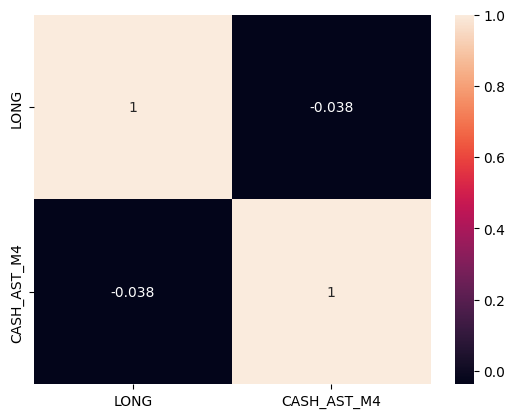

In [15]:
sns.heatmap(cs_df.corr(), annot=True)

▲ 'HLD_TR_RATIO'와 'CASH_AST_M4'의 상관관계는 거의 '0'에 가까움

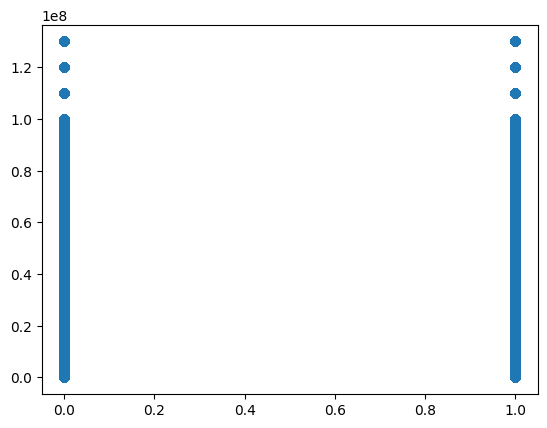

In [16]:
#산점도
plt.scatter(cs_df["LONG"], cs_df["CASH_AST_M4"], alpha=0.2)

In [17]:
#LONG 변수의 변수별 값 개수
cs_df["LONG"].value_counts()

1    323934
0    216091
Name: LONG, dtype: int64

## (3-2) K-Means Clustering
비지도 학습 알고리즘. 사전에 군집 개수 k와 초기값(=각 그룹의 초기 중심점)을 입력하면 데이터의 유사도를 바탕으로 각 데이터의 그룹을 할당해나가는 Hard Clustering 알고리즘임.
<br>*Hard Clustering: 무조건 중심에 가까운 쪽의 그룹으로 할당하는 군집화 알고리즘

**<장점>**
1. 직관적이고 구현이 쉬움
2. 대용량 데이터에 적용 가능
3. 수렴성이 보장됨

**<단점>**
1. 초기값에 민감함
- 초기값에 따라서 결과가 매우 달라질 수 있음.

2. 이상치에 영향을 받음
- 거리를 Euclidean Distance를 기반으로 하기 때문에 중심값을 업데이트하는 과정에서 이상치에 영향을 받을 수 있음.
- 따라서 이상치가 많은 데이터의 경우, 클러스터의 대푯값을 중앙값으로 결정하는 K-Medoids 방법이 나을 수도 있음.

3. 그룹 내 분산 구조를 반영할 수 없음
- 거리를 Euclidean Distance를 기반으로 하기 때문에 그룹 내 분산 구조를 제대로 반영할 수 없음.

4. 차원의 저주에 걸릴 수 있음
- 고차원으로 갈수록 개별 데이터 간 거리가 가까워져 클러스터링 효과가 없을 수 있음.
- 군집끼리는 거리를 최대한 떨어뜨려놔야 클러스터링을 하는 의미가 있음.

5. 군집의 개수를 정해야 함
- 군집 개수를 자동으로 잡아주지 않고 사전에 정해줘야 함.
- 군집 개수는 Dunn Index, 실루엣(Silhouette) Index 등과 같은 지표를 이용하여 정할 수 있음.

6. 범주형 변수가 있으면 적용 불가능
- Euclidean Distance를 사용하기 때문에 범주형 변수가 있으면 적용할 수 없음.
- 이 경우엔 K-Means 클러스터링 알고리즘을 확장한 K-Modes 클러스터링 알고리즘을 이용하면 군집화가 가능함.

### (3-2-1) 표준화 스케일링
K-Means 클러스터링은 유클리드 거리 기반으로 유사도를 계산하기 때문에 표준화를 해줘야 함.

In [18]:
from sklearn.cluster import KMeans

In [19]:
#표준화 진행
cs_df_scale = StandardScaler().fit_transform(cs_df)
cs_df_scale

array([[ 0.81675175, -0.26293075],
       [ 0.81675175,  0.08363646],
       [ 0.81675175, -0.3668514 ],
       ...,
       [-1.22436224, -0.32382756],
       [-1.22436224, -0.35056274],
       [-1.22436224, -0.35155293]])

### (3-2-2) 클러스터링 및 평가

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-20-d4ba8db81ea7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_df["cluster"] = model.fit_predict(cs_df_scale)


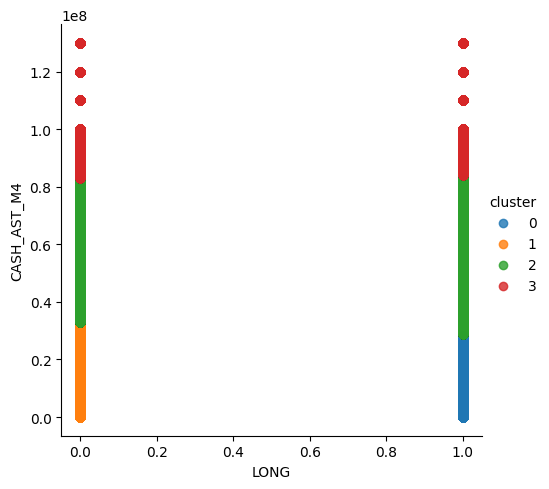

In [20]:
k = 4 #군집 개수

#군집 개수와 random_state 설정
model = KMeans(n_clusters = k, random_state = 123)

#클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
cs_df["cluster"] = model.fit_predict(cs_df_scale)

#2차원 그래프로 클러스터링 결과를 시각화
sns.lmplot(x="LONG", y="CASH_AST_M4", hue="cluster", data=cs_df, fit_reg=False)

In [21]:
#cs_df를 초기화 (cluster 열을 제거)
cs_df = cs_df.drop("cluster", axis=1)
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   LONG         540025 non-null  uint8
 1   CASH_AST_M4  540025 non-null  int32
dtypes: int32(1), uint8(1)
memory usage: 2.6 MB


▲ 예상과 다르게 LONG에서의 값을 기준으로 그룹이 분리가 안 됨.
<br>LONG의 특성이 반영 안 됨.

> **K-Means 클러스터링 <span style="color:Red">기각!</span>**
<br>기준 변수들의 특성을 잘 반영하지 못하고 클러스터링 결과도 의미가 없음

## ~(3-3) K-Medoids 클러스터링~
- K-Means 클러스터링처럼 클러스터의 중심을 좌표평면상의 임의의 점이 아니라 데이터셋의 값 중 하나를 선정함.
- 각 군집에 할당된 데이터들의 중앙점(medoids) 좌표를 이용해서 군집의 중심을 반복적으로 업데이트하며 군집을 형성하는 알고리즘.
- K-Medoids 클러스터링은 PAM(Patitioning Around Medoids) 클러스터링이라고 하기도 함.

- 데이터셋에서 군집의 중심점 k개를 임의로 선정함.
<br>=> 각 데이터를 가장 가까운 대표 개체(=medoid)에 할당함.
<br>=> 각 군집마다 군집 내 개체들과의 평균 거리를 최소화하는 원소를 새로운 대표 개체로 설정함.
<br>=> 더 이상 대표 개체에 변화가 없을 때까지 반복함.

**<장점>**
1. 이상치와 노이즈 처리가 매우 우수하고 매우 강건하게 수렴함
- 실제 데이터셋에 있는 값을 중심값으로 하기 때문에
2. K-Means에 비해 이상치에 덜 민감함

**<단점>**
1. K-Means에 비해 계산량이 많음
- 새로운 중심을 데이터중 하나로 선정해야 하기 때문에 단순히 좌표값 평균으로 중심을 찾는 K-Means 클러스터링에 비해 계산량이 많음.
2. 데이터셋이 원형의 군집이 아닌 경우, 군집의 판별력이 떨어질 수 있음
3. 사전에 군집 수와 초기값을 정해줘야 함

### (3-2-1) 표준화 스케일링
K-Medoids 클러스터링도 K-Means처럼 거리 기반으로 유사도를 계산하기 때문에 표준화를 해줘야 함.

In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.6 MB/s eta 0:00:00


In [22]:
#표준화된 데이터
cs_df_scale

array([[ 0.81675175, -0.26293075],
       [ 0.81675175,  0.08363646],
       [ 0.81675175, -0.3668514 ],
       ...,
       [-1.22436224, -0.32382756],
       [-1.22436224, -0.35056274],
       [-1.22436224, -0.35155293]])

### (1-2-2) 클러스터링 및 평가

k = 4 #군집 개수

#군집 개수와 random_state 설정
model = KMedoids(n_clusters = k, method="pam", random_state = 123)

#클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
cs_df["cluster"] = model.fit_predict(cs_df_scale)

sns.lmplot(x="LONG", y="CASH_AST_M4", hue="cluster", data=cs_df, fit_reg=False)

**▲ 메모리 용량으로 인한 오류 발생으로 해당 코드는 마크다운 처리함.**

## ~(3-4) 병합 군집(agglomerative clustering)~
계층적 군집 알고리즘. 각 데이터를 하나의 클러스터로 지정하여 시작하는데 지정된 클러스터의 개수가 될때까지 가장 비슷한 두 클러스터를 합쳐나감. linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정함.

<br><linkage 옵션>
- ward: 기본값. 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침. 그래서 크기가 비교적 비슷한 클러스터가 만들어짐.
- average: 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합침.
- complete: 최대 연결이라고도 함. 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합침.
<br>
<br>=> ward가 대부분의 데이터셋에 알맞기 때문에 자주 쓰임. 그러나 클러스터에 속한 포인트 수가 많이 다를 땐(ex. 한 클러스터가 다른 것보다 매우 클 때) average나 complete가 더 나을 수 있음.

**<장점>**
1. 서로 다른 레벨의 클러스터링을 시각적으로 표현(=덴드로그램)할 수 있음
2. 특정 수의 클러스터를 가정하지 않음

<br>**<단점>**
1. 반복할 수 없으므로 불안정함
- 두 클러스터를 합치기로 결정했으면 돌이킬 수 없음
2. 계산하는데 소모되는 시간이 큼
3. 성능이 데이터 스케일링에 매우 의존함
4. 복잡한 형상을 구분하지 못함


### (3-4-1) 표준화 스케일링

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
#표준화된 데이터
cs_df_scale

array([[ 0.81675175, -0.26293075],
       [ 0.81675175,  0.08363646],
       [ 0.81675175, -0.3668514 ],
       ...,
       [-1.22436224, -0.32382756],
       [-1.22436224, -0.35056274],
       [-1.22436224, -0.35155293]])

### (3-4-2) 클러스터링 진행 및 평가

**(Case1) k=2**

k = 2 #군집 개수

#모델 설정
model = AgglomerativeClustering(n_clusters=k, linkage="ward")

#클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
cs_df["cluster"] = model.fit_predict(cs_df_scale)

sns.lmplot(x="LONG", y="CASH_AST_M4", hue="cluster", data=cs_df, fit_reg=False)

**▲ 메모리 용량으로 인한 오류 발생으로 해당 코드는 마크다운 처리함.**

### (3-4-3) 덴드로그램(dendrogram)
병합 군집(=계층적 군집)의 또 다른 방식

In [ ]:
#scipy에서 ward 군집 함수와 덴드로그램 함수를 불러옴
import scipy.cluster.hierarchy as sch

**(Case1)** method="ward" / cutoff=0.7

#데이터 배열 df_scale에 ward 거리 함수 적용
dend1 = sch.linkage(cs_df_scale, method="ward")

#클러스터 간의 거리 정보가 담긴 dend1을 사용해 덴드로그램을 그림
cutoff = 0.7*max(dend1[:,2]) #각 클러스터 색을 구분해주는 기준값
dend1_plot = sch.dendrogram(dend1, color_threshold=cutoff)

plt.xlabel("index")
plt.ylabel("Cluster Distance")

plt.axhline(cutoff, linestyle="--", color="black") #기준선
ax = plt.gca()
bounds = ax.get_xbound()
ax.text(bounds[1], cutoff, f'{len(set(dend1_plot["leaves_color_list"]))} clusters', va="center")
plt.title('method = "ward"')

**▲ 메모리 용량으로 인한 오류 발생으로 해당 코드는 마크다운 처리함.**

## ~(3-5) DBSCAN(Density-Based Spatial Clustering of Applications with Noise)~
밀도기반 클러스터링 알고리즘. "유사한 데이터는 서로 근접하게 분포할 것이다"라는 가정을 기반으로 함.
<br>=> 데이터 밀집도가 높은 지역이 한 클러스터를 구성하며, 비교적 비어있는 지역을 경계로 다른 클러스터와 구분된다는 원리
- K-Means와 달리 사전에 군집 개수를 정하지 않고 자동으로 최적의 k를 찾아나감.
- 매개변수로 min_samples와 eps가 있음.
<br>=> 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 개수만큼 들어 있으면, 이 데이터 포인트를 밀집 지역에 있는 포인트(= 핵심 샘플)로 분류함. 이 포인트들은 DBSCAN에 의해 동일한 클러스터로 합쳐짐.
- eps를 증가시키면 하나의 클러스터에 더 많은 데이터가 포함됨.
- min_samples를 키우면 핵심 포인트 수가 줄어들며 잡음 포인트가 늘어남.
- 이 알고리즘은 시작할 때 무작위로 포인트를 선택함.
<br>=> 그다음 이 포인트에서 eps 거리 안의 모든 포인트를 찾음.
<br>=> 만약 eps 거리 안에 있는 포인트 수가 min_samples 보다 적으면 그 포인트는 어떤 군집에도 속하지 않는 잡음(noise)으로 분류함.
<br>=> 만약 eps 거리 안에 있는 포인트 수가 min_samples 보다 많으면 그 포인트는 핵심 샘플로 분류하고 새로운 클러스터를 할당함.
<br>=> 그런 다음 그 포인트의 (eps 거리 안의)모든 이웃을 살핌. 만약 어떤 군집에도 속하지 않았다면 바로 전에 만든 클러스터 레이블을 할당함. 만약 핵심 샘플이면 그 포인트의 이웃을 차례로 방문함.
<br>*이런 절차를 반복하여 eps 거리 안에 더 이상 핵심 샘플이 없을 때까지 클러스터를 키워나가고, 그런 다음 아직 살펴보지 못한 포인트를 선택하여 같은 과정을 반복함.
- 한 데이터셋에 DBSCAN을 여러 번 실행하면 핵심 포인트의 군집은 항상 같고 매번 같은 포인트를 잡음으로 레이블함.
- 그러나 경계 포인트(핵심 포인트에서 eps 거리 안에 있는 포인트)는 한 개 이상의 클러스터 핵심 샘플의 이웃일 수 있음.
<br>=> 따라서 경계 포인트가 어떤 군집에 속할지는 포인트를 방문하는 순서에 따라 달라짐.
<br>=> 그러나 일반적으로 경계 포인트는 많지 않으며 포인트 순서 때문에 받는 영향도 적어 중요한 부분은 아님.
- 적절한 eps 값을 쉽게 찾으려면 StandardScaler나 MinMaxScaler로 모든 특성의 스케일을 비슷한 범위로 조정해주는 것이 좋음.

**<장점>**
1. 군집의 개수를 미리 정할 필요가 없음
2. 복잡한 형상의 군집도 찾을 수 있음
3. 어떤 군집에도 속하지 않는 데이터를 구분할 수 있음
4. 비교적 큰 데이터셋에도 적용할 수 있음
5. 이상치에 강함

**<단점>**
1. 다른 클러스터링 방법에 비해 다소 느림
2. 배제되는 데이터가 몇 개가 될지 알 수 없음
3. 특성을 설명할 수 있는 데이터마저 군집화에서 제외될 수 있는 위험이 있음

### (3-5-1) 표준화 스케일링

In [ ]:
from sklearn.cluster import DBSCAN

In [24]:
cs_df_scale

array([[ 0.81675175, -0.26293075],
       [ 0.81675175,  0.08363646],
       [ 0.81675175, -0.3668514 ],
       ...,
       [-1.22436224, -0.32382756],
       [-1.22436224, -0.35056274],
       [-1.22436224, -0.35155293]])

**(Case1)** eps=0.3 / min_samples=5

#eps=0.3, min_samples=5인 경우
db_scan = DBSCAN(eps=0.3, min_samples=5).fit(cs_df_scale)
clusters = db_scan.labels_
print(f'레이블 개수: {len(set(clusters))}')
print(clusters)

**▲ 메모리 용량으로 인한 오류 발생으로 해당 코드는 마크다운 처리함.**

## (3-6) SOM(Self-Organizing Map, 자기조직화지도)
차원축소와 군집화를 동시에 수행하는 기법. 대뇌피질의 시각피질의 학습 과정을 모델화한 인공신경망으로서 자율 학습에 의한 클러스터링을 수행하는 알고리즘. 비지도 학습임.
<br>?자기조직화(Self-Organizing): 주어진 입력패턴에 대하여 정확한 해답을 미리 주지 않고 자기 스스로 학습할 수 있는 능력
<br>?경쟁층(competitive layer): 입력 벡터의 특성에 따라 입력 벡터가 한 점으로 클러스터링 되는 층
<br>?가중치(weight): 인공신경망에서 가중치는 각 입력 값에 대한 입력 값의 중요도 값을 의미함.

- 시각화가 가능한 저차원(2차원 or 3차원) 격자에 고차원 데이터의 각 개체들이 대응하도록 인공신경망과 유사한 방식의 학습을 통해 군집을 분류하는 기법.
- 고차원의 데이터 원공간에서 유사한 개체들은 저차원에 인접한 격자들과 연결됨.
- 저차원 격자에서의 유사도는 고차원 입력 공간에서의 유사도를 최대한 보존하도록 학습됨.
- 저차원 격자 하나에는 여러 개의 입력벡터들이 속할 수 있음. 여기에 속한 입력벡터들끼리는 서로 위치적인 유사도(= 가까운 곳에 있음)를 가짐.
- 임의의 n차원 입력벡터가 들어왔을 때 가장 가까운 격자벡터를 찾음. 이를 Winning Node라고 함. 이 벡터에 대응되는 2차원상 격자에 해당 입력벡터를 할당하면 이것이 바로 군집화가 됨.

<알고리즘 과정>
1. SOM 맵의 노드에 대한 연결 강도로 초기화
2. 입력 벡터와 경쟁층 노드 간의 유클리드 거리를 계산하여 입력 벡터와 가장 가까운 노드를 선택
3. 선택된 노드와 이웃 노드의 가중치를 수정
4. 단계를 반복하면서 연결 강도는 입력 패턴과 가장 유사한 경쟁층 뉴런이 승자가 됨
5. 승자 독식 구조로 인해 경쟁층에서는 승자 뉴런만이 나타남

**<장점>**
1. 입력 변수의 위치 관계를 그대로 보존함
2. 시각적인 이해가 쉬움
- 패턴 발견, 이미지 분석 등에서 뛰어난 성능을 보임.


In [29]:
!pip install sklearn_som
from sklearn_som.som import SOM

In [25]:
cs_df_scale

array([[ 0.81675175, -0.26293075],
       [ 0.81675175,  0.08363646],
       [ 0.81675175, -0.3668514 ],
       ...,
       [-1.22436224, -0.32382756],
       [-1.22436224, -0.35056274],
       [-1.22436224, -0.35155293]])

**(Case1) k=4: m=2, n=2, dim=2**

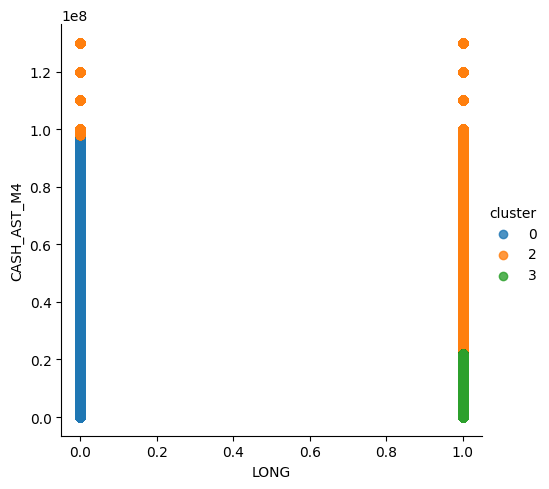

In [30]:
#k=4인 경우

#모델 설정
som = SOM(m=2, n=2, dim=2, random_state=123)
#클러스터링 결과 저장
cs_df["cluster"] = som.fit_predict(cs_df_scale)

sns.lmplot(x="LONG", y="CASH_AST_M4", hue="cluster", data=cs_df, fit_reg=False)

**▲ 4개의 클러스터가 아니라 3개의 클러스터만 나옴.**

In [31]:
#cs_df를 초기화 (cluster 열을 제거)
cs_df = cs_df.drop("cluster", axis=1)
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   LONG         540025 non-null  uint8
 1   CASH_AST_M4  540025 non-null  int32
dtypes: int32(1), uint8(1)
memory usage: 2.6 MB


**(Case2) k=4: m=4, n=1, dim=2**

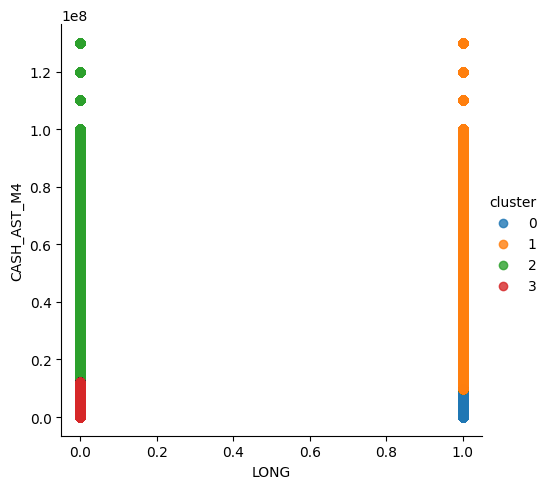

In [32]:
#k=4인 경우

#모델 설정
som = SOM(m=4, n=1, dim=2, random_state=123)
#클러스터링 결과 저장
cs_df["cluster"] = som.fit_predict(cs_df_scale)

sns.lmplot(x="LONG", y="CASH_AST_M4", hue="cluster", data=cs_df, fit_reg=False)

**▲ 그나마 클러스터링이 잘 나옴**

In [33]:
#cs_data 데이터프레임에 클러스터링 결과를 저장
cs_data["cluster"] = cs_df["cluster"]
cs_data

,HLD_TR_RATIO,LONG,SHORT,CASH_AST_M4,RATE_OF_RETURN_M1,RATE_OF_RETURN_M2,RATE_OF_RETURN_M3,RATE_OF_RETURN_M4,RANK_M1,RANK_M2,...,RANK_M4,PERCENTILE_M1,PERCENTILE_M2,PERCENTILE_M3,PERCENTILE_M4,GRADE_M1,GRADE_M2,GRADE_M3,GRADE_M4,cluster
0,0.0,1,0,2100000.0,3.092784,13.402062,13.402062,4.545455,3920.0,3727.0,...,9102.0,3.472617,2.903569,4.039443,11.192074,master,master,master,pro,0
1,0.0,1,0,9100000.0,-22.000000,-16.483516,-6.666667,-9.090909,19286.0,21364.0,...,19723.0,43.756678,47.447989,31.329105,41.346234,semi-pro,rookie,semi-pro,semi-pro,0
2,0.0,1,0,1000.0,-46.732026,-40.000000,-38.852459,-30.655738,44223.0,43054.0,...,39856.0,88.926624,88.001852,86.969122,78.832461,beginner,beginner,beginner,rookie,0
3,0.0,1,0,51000000.0,4.347826,0.000000,0.000000,0.000000,3663.0,7997.0,...,11776.0,3.139114,20.387575,21.419934,25.945095,master,semi-pro,semi-pro,semi-pro,1
4,0.0,1,0,600000.0,-8.333333,0.000000,0.000000,0.000000,8526.0,7997.0,...,11776.0,19.627239,20.387575,21.419934,25.945095,semi-pro,semi-pro,semi-pro,semi-pro,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540020,0.0,1,0,72000.0,-26.470588,-18.181818,-21.212121,-18.181818,24679.0,23389.0,...,28802.0,54.292672,52.606268,60.516272,58.677098,rookie,rookie,rookie,rookie,0
540021,1.0,0,1,4700000.0,-62.337662,-62.666667,-61.333333,-65.333333,50846.0,50608.0,...,53102.0,97.690848,98.460627,98.157678,98.618397,beginner,beginner,beginner,beginner,3
540022,0.1,0,1,870000.0,0.000000,12.000000,6.451613,0.000000,4594.0,3955.0,...,11776.0,10.748762,3.222258,6.873756,25.945095,pro,master,pro,semi-pro,3
540023,0.2,0,1,330000.0,-29.166667,-25.000000,-25.000000,-24.000000,27841.0,30619.0,...,34220.0,60.423499,66.674135,68.323318,69.352900,rookie,rookie,rookie,rookie,3


In [35]:
#클러스터별 인원 수 확인
cs_data["cluster"].value_counts()

0    276655
3    184068
1     47279
2     32023
Name: cluster, dtype: int64

# (4) 결과 해석 및 시각화
- 클러스터링 때 'HLD_TR_RATIO' 변수에서 장타와 단타가 분류되어 파생된 변수인 'LONG'을 사용하였지만, 클러스터링 결과를 시각화할 때 'LONG' 변수말고도 원래 변수인 'HLD_TR_RATIO'의 그래프도 같이 그려봄으로써 군집화 결과를 살펴봄.
- 시각화 그래프에서 클러스터 결과 통일(클러스터 색상이나 번호 등)을 위해 'LONG' 변수말고 'SHORT' 변수를 사용함.

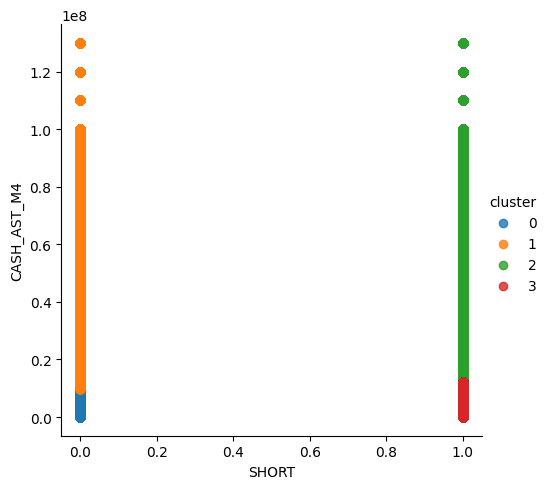

In [36]:
#SHORT와 CASH_AST_M4 변수로 클러스터링 시각화
sns.lmplot(x="SHORT", y="CASH_AST_M4", hue="cluster", data=cs_data, fit_reg=False)

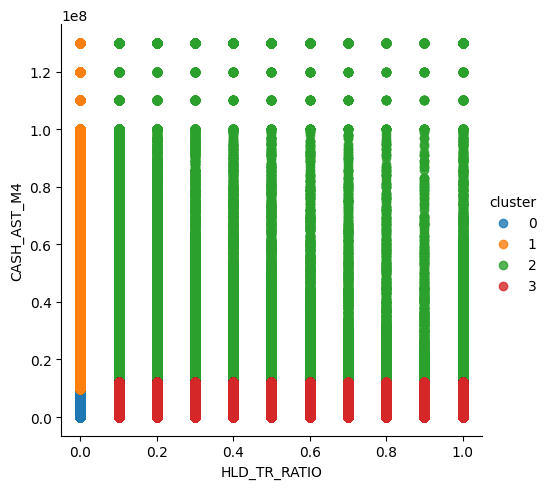

In [37]:
#HLD_TR_RATIO와 CASH_AST_M4 변수로 클러스터링 시각화
sns.lmplot(x="HLD_TR_RATIO", y="CASH_AST_M4", hue="cluster", data=cs_data, fit_reg=False)

▲ 위 그래프에서는 클러스터링 결과를 직관적으로 해석하기가 어려울 수 있음.
- 언뜻 보기에는, (<span style="color:blue">그룹0</span>, <span style="color:red">그룹3</span>)의 인원 수가 적어보이고 (<span style="color:darkorange">그룹1</span>, <span style="color:green">그룹2</span>)의 인원 수가 많아보임.
- 하지만 사실상, (<span style="color:blue">그룹0</span>, <span style="color:red">그룹3</span>)의 밀도가 높아 (<span style="color:darkorange">그룹1</span>, <span style="color:green">그룹2</span>)보다 인원 수가 더 많음을 알 수 있음.

In [38]:
#클러스터별 인원 수
cs_data["cluster"].value_counts()

0    276655
3    184068
1     47279
2     32023
Name: cluster, dtype: int64

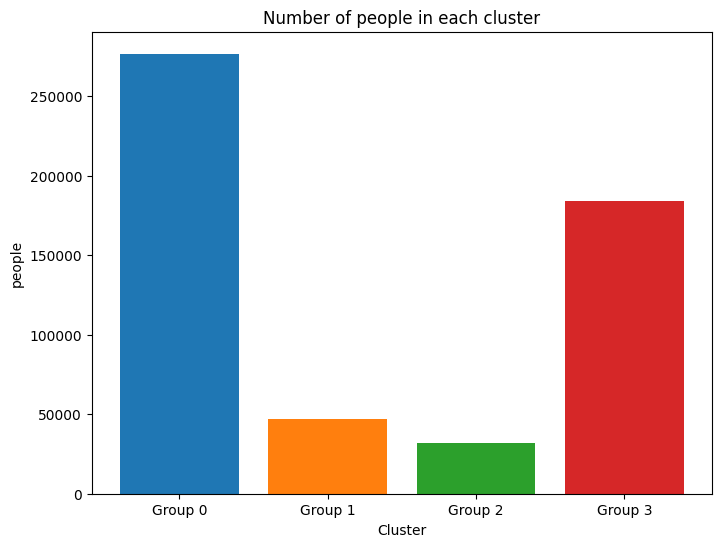

In [39]:
#클러스터별 인원 수 시각화

groups = ['Group 0', 'Group 1', 'Group 2', 'Group 3'] #클러스터 이름
counts = [276655, 47279, 32023, 184068] #클러스터별 인원 수
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"] #각 클러스터에 대한 색상 지정(HEX 코드)

plt.figure(figsize=(8, 6))
plt.bar(groups, counts, color=colors)
plt.xlabel('Cluster')
plt.ylabel('people')
plt.title('Number of people in each cluster')

plt.show()

▲ 위 그래프에서 클러스터별 인원 수를 보면, (<span style="color:blue">그룹0</span>, <span style="color:red">그룹3</span>)이 (<span style="color:darkorange">그룹1</span>, <span style="color:green">그룹2</span>)보다 인원 수가 더 많음을 알 수 있음.

In [40]:
#클러스터별 변수 특징 파악
cs_data.groupby("cluster").mean()[["LONG","SHORT","CASH_AST_M4"]]

<ipython-input-40-f71361194a09>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cs_data.groupby("cluster").mean()[["LONG","SHORT","CASH_AST_M4"]]


,LONG,SHORT,CASH_AST_M4
cluster,,,
0,1.0,0.0,1.186562e+06
1,1.0,0.0,3.953167e+07
2,0.0,1.0,4.592530e+07
3,0.0,1.0,1.814614e+06


**<클러스터 특징>**
- cluster 0: 장타(LONG) / 자산액 적음(LIGHT)
- cluster 1: 장타(LONG) / 자산액 많음(HEAVY)
- cluster 2: 단타(SHORT) / 자산액 많음(HEAVY)
- cluster 3: 단타(SHORT) / 자산액 적음(LIGHT)

# (5) 최종 데이터프레임

## (5-1) CLUSTER 변수 추가

In [42]:
#열 'cluster'를 기준으로 클러스터명 부여
cluster_name = []
for i in range(len(cs_data)):
  if cs_data["cluster"][i] == 0:
    name = "(LONG, LIGHT)"
  elif cs_data["cluster"][i] == 1:
    name = "(LONG, HEAVY)"
  elif cs_data["cluster"][i] == 2:
    name = "(SHORT, HEAVY)"
  elif cs_data["cluster"][i] == 3:
    name = "(SHORT, LIGHT)"

  cluster_name.append(name)

#새로운 열 'CLUSTER'에 클러스터명 결과값 할당
cs_data["CLUSTER"] = cluster_name
cs_data = cs_data.drop("cluster", axis=1)
cs_data

,HLD_TR_RATIO,LONG,SHORT,CASH_AST_M4,RATE_OF_RETURN_M1,RATE_OF_RETURN_M2,RATE_OF_RETURN_M3,RATE_OF_RETURN_M4,RANK_M1,RANK_M2,...,RANK_M4,PERCENTILE_M1,PERCENTILE_M2,PERCENTILE_M3,PERCENTILE_M4,GRADE_M1,GRADE_M2,GRADE_M3,GRADE_M4,CLUSTER
0,0.0,1,0,2100000.0,3.092784,13.402062,13.402062,4.545455,3920.0,3727.0,...,9102.0,3.472617,2.903569,4.039443,11.192074,master,master,master,pro,"(LONG, LIGHT)"
1,0.0,1,0,9100000.0,-22.000000,-16.483516,-6.666667,-9.090909,19286.0,21364.0,...,19723.0,43.756678,47.447989,31.329105,41.346234,semi-pro,rookie,semi-pro,semi-pro,"(LONG, LIGHT)"
2,0.0,1,0,1000.0,-46.732026,-40.000000,-38.852459,-30.655738,44223.0,43054.0,...,39856.0,88.926624,88.001852,86.969122,78.832461,beginner,beginner,beginner,rookie,"(LONG, LIGHT)"
3,0.0,1,0,51000000.0,4.347826,0.000000,0.000000,0.000000,3663.0,7997.0,...,11776.0,3.139114,20.387575,21.419934,25.945095,master,semi-pro,semi-pro,semi-pro,"(LONG, HEAVY)"
4,0.0,1,0,600000.0,-8.333333,0.000000,0.000000,0.000000,8526.0,7997.0,...,11776.0,19.627239,20.387575,21.419934,25.945095,semi-pro,semi-pro,semi-pro,semi-pro,"(LONG, LIGHT)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540020,0.0,1,0,72000.0,-26.470588,-18.181818,-21.212121,-18.181818,24679.0,23389.0,...,28802.0,54.292672,52.606268,60.516272,58.677098,rookie,rookie,rookie,rookie,"(LONG, LIGHT)"
540021,1.0,0,1,4700000.0,-62.337662,-62.666667,-61.333333,-65.333333,50846.0,50608.0,...,53102.0,97.690848,98.460627,98.157678,98.618397,beginner,beginner,beginner,beginner,"(SHORT, LIGHT)"
540022,0.1,0,1,870000.0,0.000000,12.000000,6.451613,0.000000,4594.0,3955.0,...,11776.0,10.748762,3.222258,6.873756,25.945095,pro,master,pro,semi-pro,"(SHORT, LIGHT)"
540023,0.2,0,1,330000.0,-29.166667,-25.000000,-25.000000,-24.000000,27841.0,30619.0,...,34220.0,60.423499,66.674135,68.323318,69.352900,rookie,rookie,rookie,rookie,"(SHORT, LIGHT)"


## (5-2) 데이터 용량 축소
github 업로드를 위해 불필요 변수 삭제 및 데이터 타입 변환을 통해 용량을 축소시킴

In [43]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HLD_TR_RATIO       540025 non-null  float64
 1   LONG               540025 non-null  int64  
 2   SHORT              540025 non-null  int64  
 3   CASH_AST_M4        540025 non-null  float64
 4   RATE_OF_RETURN_M1  540025 non-null  float64
 5   RATE_OF_RETURN_M2  540025 non-null  float64
 6   RATE_OF_RETURN_M3  540025 non-null  float64
 7   RATE_OF_RETURN_M4  540025 non-null  float64
 8   RANK_M1            540025 non-null  float64
 9   RANK_M2            540025 non-null  float64
 10  RANK_M3            540025 non-null  float64
 11  RANK_M4            540025 non-null  float64
 12  PERCENTILE_M1      540025 non-null  float64
 13  PERCENTILE_M2      540025 non-null  float64
 14  PERCENTILE_M3      540025 non-null  float64
 15  PERCENTILE_M4      540025 non-null  float64
 16  GR

In [45]:
#필요없는 변수들은 제거
cs_data = cs_data.drop(["HLD_TR_RATIO", "LONG", "SHORT", "CASH_AST_M4"], axis=1)
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   RATE_OF_RETURN_M1  540025 non-null  float64
 1   RATE_OF_RETURN_M2  540025 non-null  float64
 2   RATE_OF_RETURN_M3  540025 non-null  float64
 3   RATE_OF_RETURN_M4  540025 non-null  float64
 4   RANK_M1            540025 non-null  float64
 5   RANK_M2            540025 non-null  float64
 6   RANK_M3            540025 non-null  float64
 7   RANK_M4            540025 non-null  float64
 8   PERCENTILE_M1      540025 non-null  float64
 9   PERCENTILE_M2      540025 non-null  float64
 10  PERCENTILE_M3      540025 non-null  float64
 11  PERCENTILE_M4      540025 non-null  float64
 12  GRADE_M1           540025 non-null  object 
 13  GRADE_M2           540025 non-null  object 
 14  GRADE_M3           540025 non-null  object 
 15  GRADE_M4           540025 non-null  object 
 16  CL

In [52]:
#각 변수들의 데이터 범위 확인
cs_data.describe()

,RATE_OF_RETURN_M1,RATE_OF_RETURN_M2,RATE_OF_RETURN_M3,RATE_OF_RETURN_M4,RANK_M1,RANK_M2,RANK_M3,RANK_M4,PERCENTILE_M1,PERCENTILE_M2,PERCENTILE_M3,PERCENTILE_M4
count,540025.000000,540025.000000,540025.000000,540025.000000,540025.000000,540025.000000,540025.000000,540025.000000,540025.000000,540025.000000,540025.000000,540025.000000
mean,-23.713908,-17.240556,-16.023279,-13.268488,23852.028145,23848.355604,24889.863684,25813.528526,50.330588,50.633594,50.634466,50.705293
std,81.276681,74.292181,94.827468,122.086455,14489.547905,14027.329366,14215.339557,14292.800402,28.549689,28.238424,28.252863,28.260184
min,-99.700000,-99.989211,-99.989351,-99.989487,1.000000,1.000000,1.000000,1.000000,0.000185,0.000185,0.000185,0.000185
25%,-36.507937,-30.000000,-29.230769,-27.777778,10874.000000,10919.000000,11852.000000,11776.000000,25.041063,25.000139,25.063099,25.945095
50%,-25.000000,-17.241379,-16.071429,-13.636364,22805.000000,22399.000000,23478.000000,24312.000000,51.680756,50.114161,50.008426,50.059534
75%,-12.000000,-4.285714,-3.333333,0.000000,35825.000000,35496.000000,36641.000000,37538.000000,75.011342,75.279478,75.034119,75.019119
max,37900.000000,31900.000000,32553.061224,43986.021505,54525.000000,53187.000000,54500.000000,55686.000000,100.000000,100.000000,100.000000,100.000000


In [54]:
#'RATE_OF_RETURN'과 'PERCENTILE'은 float32로 타입 변환
cs_data["RATE_OF_RETURN_M1"] = cs_data["RATE_OF_RETURN_M1"].astype(np.float32)
cs_data["RATE_OF_RETURN_M2"] = cs_data["RATE_OF_RETURN_M2"].astype(np.float32)
cs_data["RATE_OF_RETURN_M3"] = cs_data["RATE_OF_RETURN_M3"].astype(np.float32)
cs_data["RATE_OF_RETURN_M4"] = cs_data["RATE_OF_RETURN_M4"].astype(np.float32)

cs_data["PERCENTILE_M1"] = cs_data["PERCENTILE_M1"].astype(np.float32)
cs_data["PERCENTILE_M2"] = cs_data["PERCENTILE_M2"].astype(np.float32)
cs_data["PERCENTILE_M3"] = cs_data["PERCENTILE_M3"].astype(np.float32)
cs_data["PERCENTILE_M4"] = cs_data["PERCENTILE_M4"].astype(np.float32)

#'RANK'는 int32로 타입 변환
cs_data["RANK_M1"] = cs_data["RANK_M1"].astype(np.int32)
cs_data["RANK_M2"] = cs_data["RANK_M2"].astype(np.int32)
cs_data["RANK_M3"] = cs_data["RANK_M3"].astype(np.int32)
cs_data["RANK_M4"] = cs_data["RANK_M4"].astype(np.int32)

cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   RATE_OF_RETURN_M1  540025 non-null  float32
 1   RATE_OF_RETURN_M2  540025 non-null  float32
 2   RATE_OF_RETURN_M3  540025 non-null  float32
 3   RATE_OF_RETURN_M4  540025 non-null  float32
 4   RANK_M1            540025 non-null  int32  
 5   RANK_M2            540025 non-null  int32  
 6   RANK_M3            540025 non-null  int32  
 7   RANK_M4            540025 non-null  int32  
 8   PERCENTILE_M1      540025 non-null  float32
 9   PERCENTILE_M2      540025 non-null  float32
 10  PERCENTILE_M3      540025 non-null  float32
 11  PERCENTILE_M4      540025 non-null  float32
 12  GRADE_M1           540025 non-null  object 
 13  GRADE_M2           540025 non-null  object 
 14  GRADE_M3           540025 non-null  object 
 15  GRADE_M4           540025 non-null  object 
 16  CL

▲ 데이터 용량이 확연히 줄어든 것을 확인함!

In [56]:
cs_data

,RATE_OF_RETURN_M1,RATE_OF_RETURN_M2,RATE_OF_RETURN_M3,RATE_OF_RETURN_M4,RANK_M1,RANK_M2,RANK_M3,RANK_M4,PERCENTILE_M1,PERCENTILE_M2,PERCENTILE_M3,PERCENTILE_M4,GRADE_M1,GRADE_M2,GRADE_M3,GRADE_M4,CLUSTER
0,3.092783,13.402061,13.402061,4.545455,3920,3727,4625,9102,3.472617,2.903569,4.039443,11.192075,master,master,master,pro,"(LONG, LIGHT)"
1,-22.000000,-16.483517,-6.666667,-9.090909,19286,21364,14507,19723,43.756680,47.447990,31.329105,41.346233,semi-pro,rookie,semi-pro,semi-pro,"(LONG, LIGHT)"
2,-46.732025,-40.000000,-38.852459,-30.655737,44223,43054,43786,39856,88.926620,88.001854,86.969124,78.832458,beginner,beginner,beginner,rookie,"(LONG, LIGHT)"
3,4.347826,0.000000,0.000000,0.000000,3663,7997,9182,11776,3.139114,20.387575,21.419933,25.945095,master,semi-pro,semi-pro,semi-pro,"(LONG, HEAVY)"
4,-8.333333,0.000000,0.000000,0.000000,8526,7997,9182,11776,19.627239,20.387575,21.419933,25.945095,semi-pro,semi-pro,semi-pro,semi-pro,"(LONG, LIGHT)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540020,-26.470589,-18.181818,-21.212122,-18.181818,24679,23389,28813,28802,54.292671,52.606270,60.516273,58.677097,rookie,rookie,rookie,rookie,"(LONG, LIGHT)"
540021,-62.337662,-62.666668,-61.333332,-65.333336,50846,50608,51567,53102,97.690849,98.460625,98.157677,98.618401,beginner,beginner,beginner,beginner,"(SHORT, LIGHT)"
540022,0.000000,12.000000,6.451613,0.000000,4594,3955,6319,11776,10.748761,3.222258,6.873756,25.945095,pro,master,pro,semi-pro,"(SHORT, LIGHT)"
540023,-29.166666,-25.000000,-25.000000,-24.000000,27841,30619,32659,34220,60.423500,66.674133,68.323318,69.352898,rookie,rookie,rookie,rookie,"(SHORT, LIGHT)"


In [59]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540025 entries, 0 to 540024
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   RATE_OF_RETURN_M1  540025 non-null  float32
 1   RATE_OF_RETURN_M2  540025 non-null  float32
 2   RATE_OF_RETURN_M3  540025 non-null  float32
 3   RATE_OF_RETURN_M4  540025 non-null  float32
 4   RANK_M1            540025 non-null  int32  
 5   RANK_M2            540025 non-null  int32  
 6   RANK_M3            540025 non-null  int32  
 7   RANK_M4            540025 non-null  int32  
 8   PERCENTILE_M1      540025 non-null  float32
 9   PERCENTILE_M2      540025 non-null  float32
 10  PERCENTILE_M3      540025 non-null  float32
 11  PERCENTILE_M4      540025 non-null  float32
 12  GRADE_M1           540025 non-null  object 
 13  GRADE_M2           540025 non-null  object 
 14  GRADE_M3           540025 non-null  object 
 15  GRADE_M4           540025 non-null  object 
 16  CL

**축소한 데이터프레임을 피클(pickle)로 저장!!!**

In [61]:
#!!cs_data를 pickle 파일로 저장!!
cs_data.to_pickle("../../../data/FINALDATA/cs_data_rank_cluster.pkl")